In [1]:
#importing libraries

import pandas as pd 
import numpy as np

In [2]:
#loading dataset

dataset = pd.read_excel('DigitalAd_dataset.xlsx')
dataset

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1
...,...,...,...
395,35,65000,0
396,26,80000,0
397,26,52000,0
398,20,86000,0


In [3]:
#summarizing dataset

print(dataset.shape)
print(dataset.head(5))

(400, 3)
   Age  Salary  Status
0   18   82000       0
1   29   80000       0
2   47   25000       1
3   45   26000       1
4   46   28000       1


In [4]:
#segregating dataset into X and Y
#X(Input/Independent Variable) and Y(Output/Dependent Variable)

X = dataset.iloc[:, :-1].values
X
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,

In [6]:
#splitting dataset to Train and Test 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [8]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
#finding best K-Value

error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Text(0, 0.5, 'Mean Error')

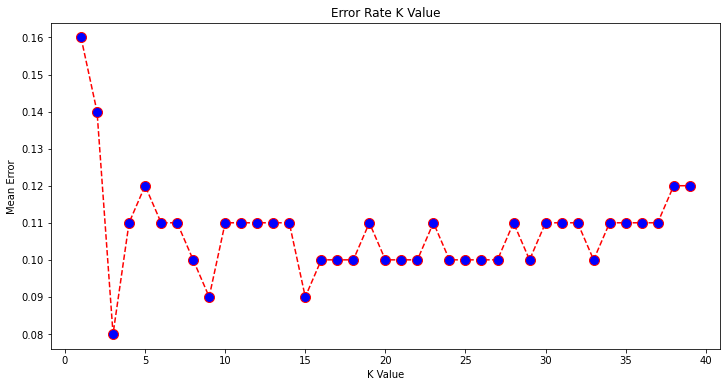

In [19]:
#calculation error in K-values between 1 and 40

for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, Y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [22]:
#training

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p =1)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [24]:
#taking input
#predicting whether the customer will buy the product or not

age = int(input("Enter New Customer Age: "))
sal = int(input("Enter New Customer Salary: "))
newCust = [[age,sal]]
result = model.predict(sc.transform(newCust))
print(result)
if result == 1:
  print("Customer will Buy")
else:
  print("Customer won't Buy")

Enter New Customer Age: 25
Enter New Customer Salary: 200000
[1]
Customer will Buy


In [25]:
#prediction for all Test Data

Y_pred = model.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [26]:
#Confusion Matrix
#Accuracy

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(Y_test, Y_pred)*100))

Confusion Matrix: 
[[56  5]
 [ 4 35]]
Accuracy of the Model: 91.0%
